In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import numpy as np
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [112]:
df = pd.read_csv('refined_life_expect.csv')
# print(df.head(20))
df.dropna(inplace=True) #remove all the observations missing data

grouped_df = df.groupby(by='country', as_index=False).agg({'life_expectancy': 'mean', 'alcohol': 'mean',
                                                           'hepatitisB': 'mean', 'bmi': 'mean',
                                                           'measles': 'mean', 'polio': 'mean',
                                                           'polio': 'mean', 'diphtheria': 'mean',
                                                           'hiv': 'mean', 'total_expenditure': 'mean',
                                                           'gdp': 'mean', 'thinness_till19': 'mean',
                                                           'status': 'unique'})

grouped_df.head(20)


,country,life_expectancy,alcohol,hepatitisB,bmi,measles,polio,diphtheria,hiv,total_expenditure,gdp,thinness_till19,status
0,Afghanistan,58.193750,0.014375,64.562500,15.518750,2362.250000,48.375000,52.312500,0.100000,8.252500,340.015425,16.581250,[Developing]
1,Albania,75.156250,4.848750,98.000000,49.068750,53.375000,98.125000,98.062500,0.100000,5.945625,2119.726679,1.618750,[Developing]
2,Algeria,74.209091,0.447273,76.454545,48.872727,647.000000,93.181818,93.363636,0.100000,4.945455,3261.289374,6.000000,[Developing]
3,Angola,50.675000,7.620000,71.000000,18.450000,3925.625000,70.875000,64.000000,2.450000,3.653750,2935.762962,9.037500,[Developing]
4,Antigua and Barbuda,75.064286,7.997857,98.214286,37.778571,0.000000,97.785714,98.500000,0.121429,4.838571,9479.055415,3.414286,[Developing]
5,Argentina,75.238462,8.004615,80.307692,54.484615,2.000000,94.461538,93.692308,0.100000,6.546154,6932.546882,1.061538,[Developing]
6,Armenia,73.306667,3.702667,87.133333,44.026667,290.333333,88.666667,86.933333,0.100000,4.861333,2108.675087,2.033333,[Developing]
7,Australia,81.907143,10.154286,93.428571,54.928571,105.785714,91.857143,92.000000,0.100000,8.839286,35391.195154,0.671429,[Developed]
8,Austria,81.480000,12.236000,80.266667,47.666667,61.800000,85.533333,86.333333,0.100000,4.715333,33171.578263,1.720000,[Developed]
9,Azerbaijan,71.146154,1.055385,56.384615,43.407692,675.923077,74.076923,82.153846,0.100000,5.849231,4004.784071,2.869231,[Developing]


In [74]:
grouped_df.shape


(147, 12)

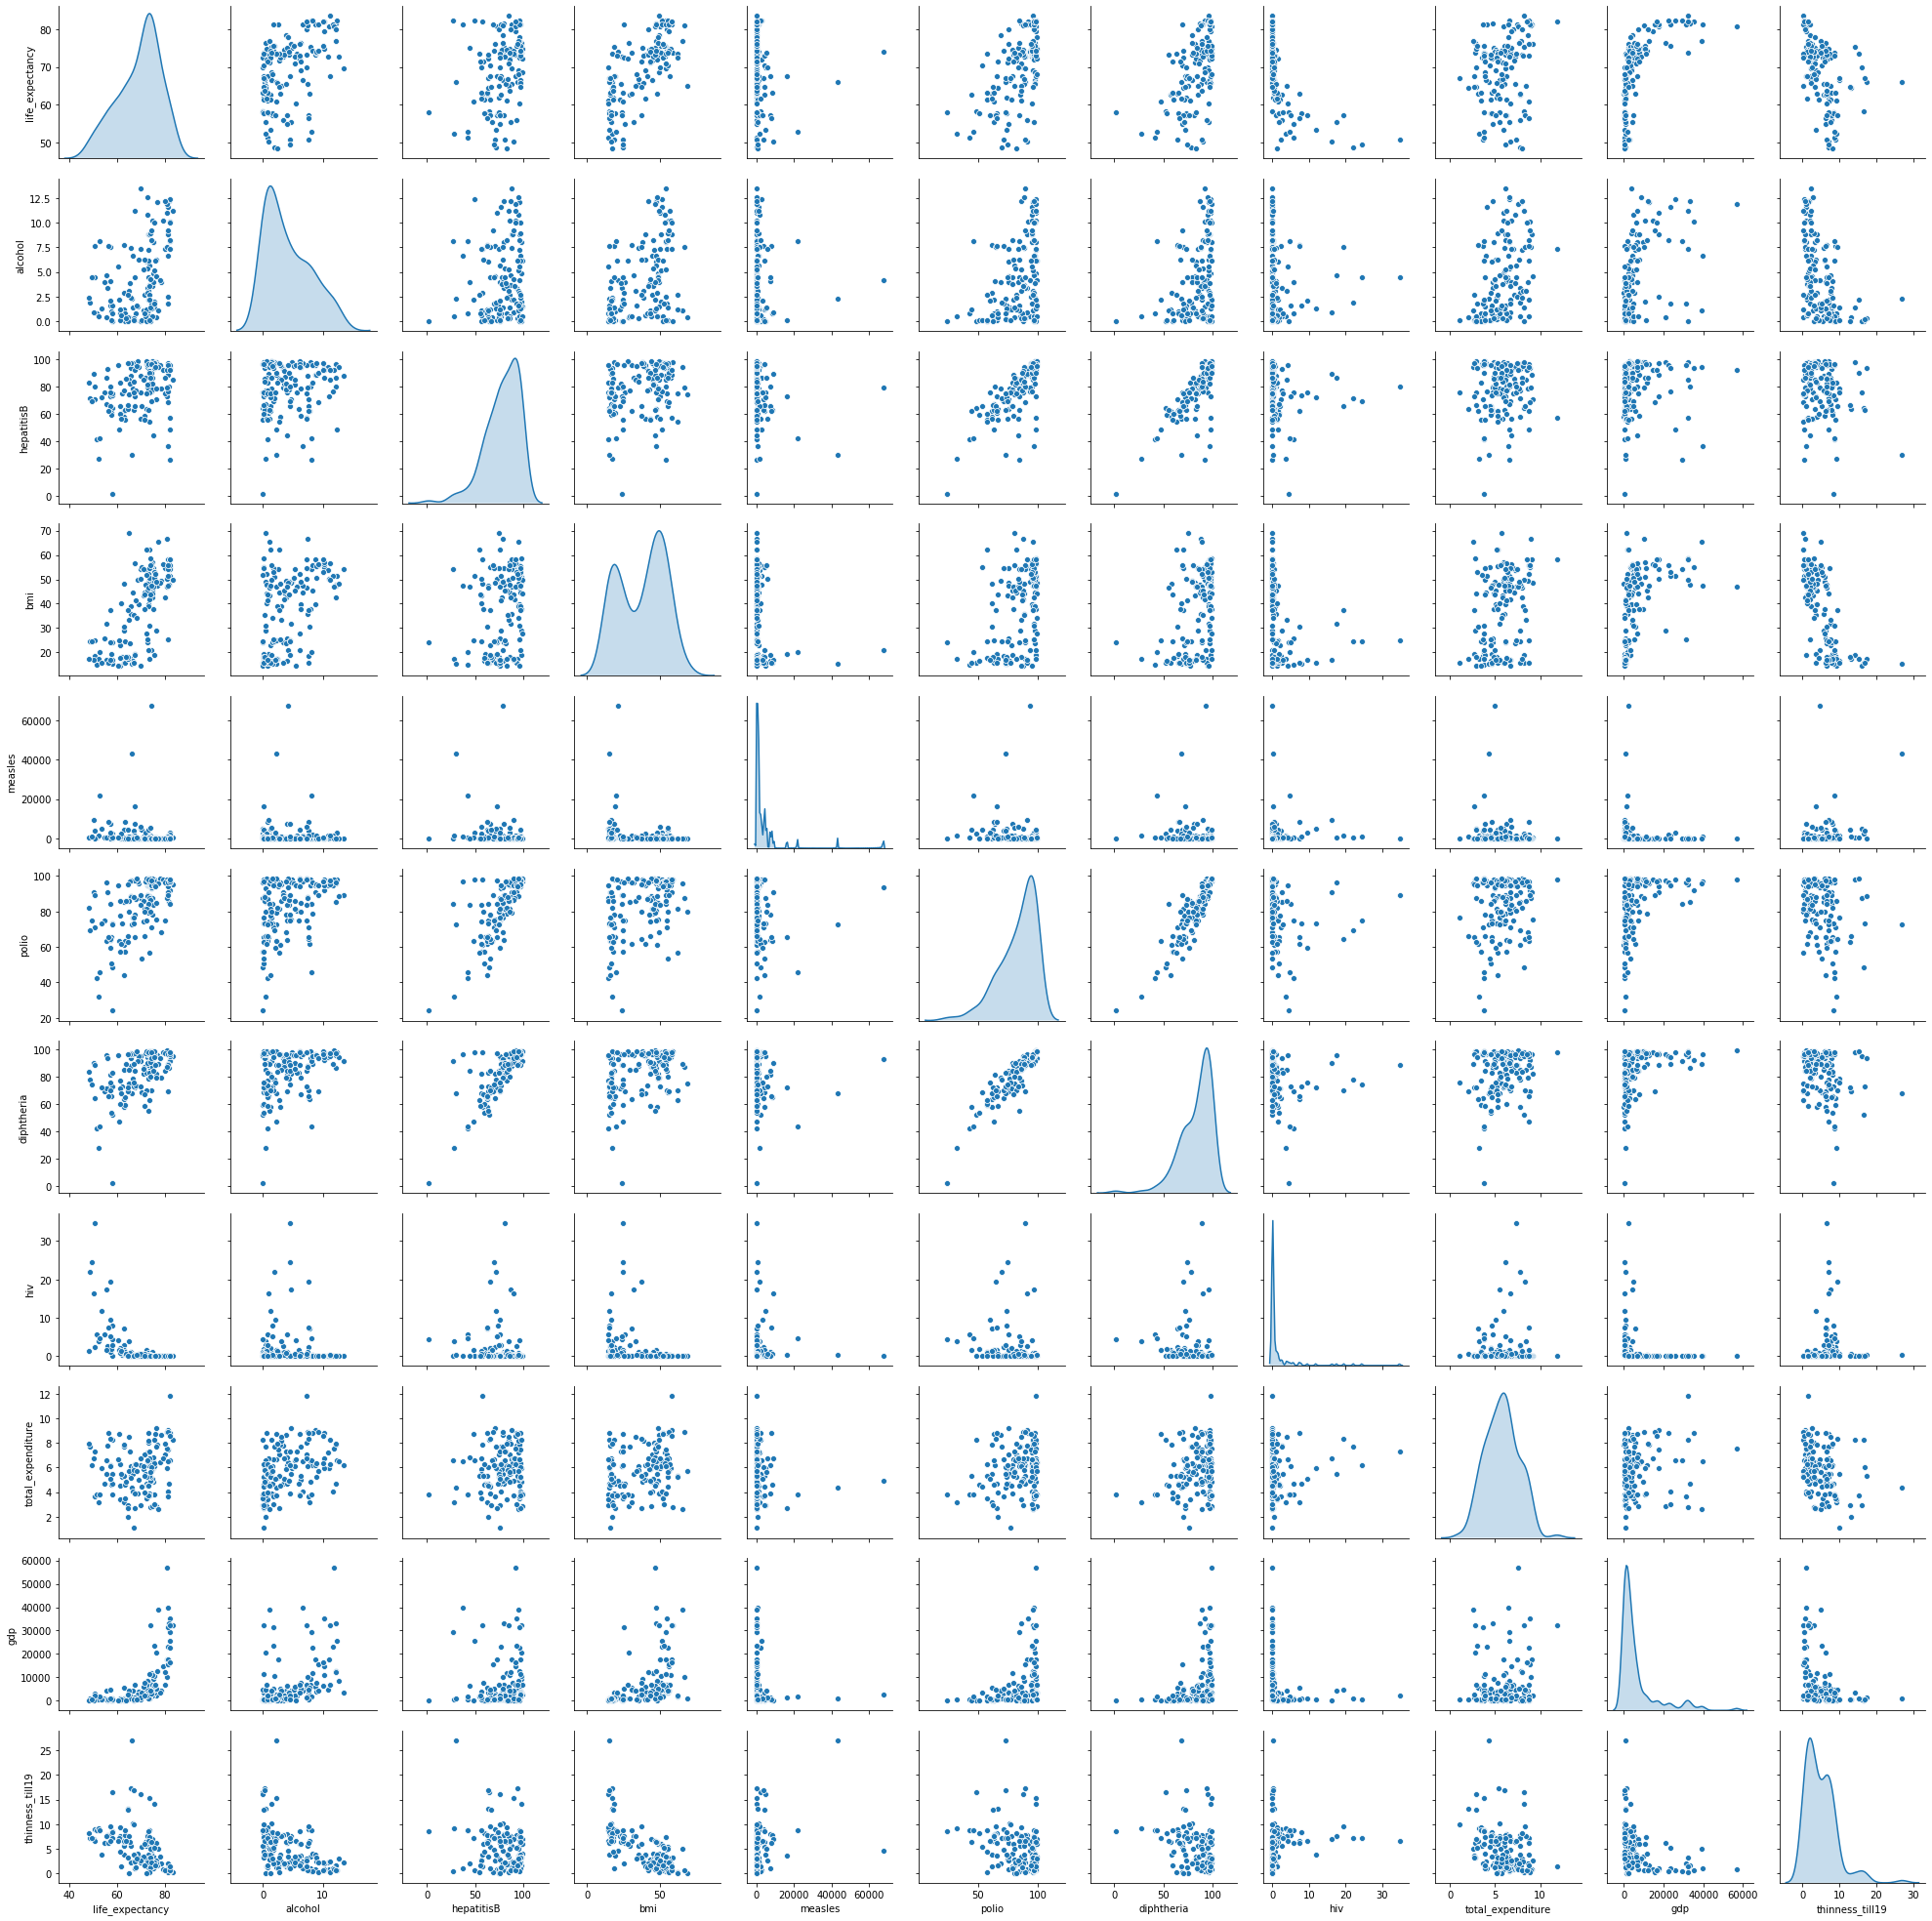

In [71]:
sns.pairplot(df, diag_kind="kde", height=2.5)

In [116]:
lr_model = ols(formula='life_expectancy~alcohol+hepatitisB+bmi+diphtheria+hiv+total_expenditure+gdp+thinness_till19+polio+measles', data=df).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     363.4
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:35:26   Log-Likelihood:                -5609.2
No. Observations:                1853   AIC:                         1.124e+04
Df Residuals:                    1842   BIC:                         1.130e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            58.6348      0.714     82.166      0.000      57.235      60.034
alcohol               0.2460      0.034      7.212      0.000       0.179       0.313
hepatitisB           -0.0056      0.006     -0.933      0.351      -0.017       0.006
bmi                   0.1005      0.007     14.170      0.000       0.087       0.114
diphtheria            0.0461      0.008      5.909      0.000       0.031       0.061
hiv                  -0.7126      0.021    -33.581      0.000      -0.754      -0.671
total_expenditure     0.1328      0.052      2.534      0.011       0.030       0.236
gdp                   0.0001    9.8e-06     15.168      0.000       0.000       0.000
thinness_till19      -0.2207      0.033     -6.662      0.000      -0.286      -0.156
polio                 0.0406      0.007      5.851      0.000       0.027       0.054
measles            9.633e-06   1.26e-05      0.766      0.444    -1.5e-05    3.43e-05
==============================================================================
Omnibus:                       27.353   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.658
Skew:                          -0.223   Prob(JB):                     8.10e-08
Kurtosis:                       3.473   Cond. No.                     8.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
lr_model = ols(formula='life_expectancy~C(status)+alcohol+hepatitisB+bmi+diphtheria+hiv+total_expenditure+gdp+thinness_till19', data=df).fit()
lr_model.summary()
#removed polio - no effect on the model, removed measles didn't look like it had a significant effect

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     413.9
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:20:47   Log-Likelihood:                -5594.3
No. Observations:                1853   AIC:                         1.121e+04
Df Residuals:                    1843   BIC:                         1.126e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  63.6250      0.831     76.569      0.000      61.995      65.255
C(status)[T.Developing]    -3.4127      0.422     -8.081      0.000      -4.241      -2.584
alcohol                     0.1224      0.038      3.232      0.001       0.048       0.197
hepatitisB                 -0.0025      0.006     -0.433      0.665      -0.014       0.009
bmi                         0.1029      0.007     14.698      0.000       0.089       0.117
diphtheria                  0.0673      0.007      9.615      0.000       0.054       0.081
hiv                        -0.7007      0.021    -33.190      0.000      -0.742      -0.659
total_expenditure           0.0988      0.052      1.899      0.058      -0.003       0.201
gdp                         0.0001   1.01e-05     12.717      0.000       0.000       0.000
thinness_till19            -0.2014      0.033     -6.169      0.000      -0.265      -0.137
==============================================================================
Omnibus:                       22.799   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.777
Skew:                          -0.229   Prob(JB):                     4.17e-06
Kurtosis:                       3.333   Cond. No.                     1.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""